In [24]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [25]:
data = pd.read_csv("../data/preprocessed/processed_xgboost_data.csv")

data

,Unnamed: 0,SeniorCitizen,Dependents,Contract,PaperlessBilling,Partner,tenure,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,No
0,0,0,0,0,1,1,1,29.85,29.85,0,1,0,0
1,1,0,0,1,0,0,34,56.95,1889.50,0,1,0,0
2,2,0,0,0,1,0,2,53.85,108.15,1,1,0,0
3,3,0,0,1,0,0,45,42.30,1840.75,0,1,0,0
4,4,0,0,0,1,0,2,70.70,151.65,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,0,1,1,1,1,24,84.80,1990.50,0,1,0,0
7039,7039,0,1,1,1,1,72,103.20,7362.90,0,0,1,0
7040,7040,0,1,0,1,1,11,29.60,346.45,0,1,0,0
7041,7041,1,0,0,1,1,4,74.40,306.60,1,0,1,0


In [26]:
# Now we will split this data into train and test sets with the split ratio of 0.7 and 0.3
X = data.drop("Churn", axis=1)
y = data["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Check for nans

print("NaNs in X_train:", X_train.isnull().sum().sum())
print("NaNs in y_train:", pd.Series(y_train).isnull().sum())

NaNs in X_train: 8
NaNs in y_train: 0


In [28]:
# Drop nans from the training set
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

In [29]:
# Now we will try to balance the data with SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [30]:
pd.Series(y_train).value_counts()

Churn
0    3627
1    3627
Name: count, dtype: int64

In [31]:
# Now we will train the model with xgboost classifier and evaluate the performance of the model
xgb_model = XGBClassifier(
    n_estimators=5000,
    max_depth=8,
    learning_rate=0.2,
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7468054898248935
Precision: 0.5328836424957841
Recall: 0.5505226480836237
F1 Score: 0.5415595544130248


In [32]:
print(classification_report(y_test, y_pred, target_names=['Class 0 (e.g., No Churn)', 'Class 1 (e.g., Churn)']))

                          precision    recall  f1-score   support

Class 0 (e.g., No Churn)       0.83      0.82      0.83      1539
   Class 1 (e.g., Churn)       0.53      0.55      0.54       574

                accuracy                           0.75      2113
               macro avg       0.68      0.69      0.68      2113
            weighted avg       0.75      0.75      0.75      2113



In [33]:
# Now we can start working on the logistic regression model and compare the two models performance.
df = pd.read_csv("../data/preprocessed/processed_logistic_data.csv")

df

,Unnamed: 0,SeniorCitizen,Dependents,Contract,PaperlessBilling,Partner,tenure,MonthlyCharges,TotalCharges,Churn,DSL,Fiber optic,No
0,0,0,0,0,1,1,-0.608696,-0.745170,-0.403038,0,1,0,0
1,1,0,0,1,0,0,0.108696,-0.246550,0.145000,0,1,0,0
2,2,0,0,0,1,0,-0.586957,-0.303588,-0.379963,1,1,0,0
3,3,0,0,1,0,0,0.347826,-0.516099,0.130633,0,1,0,0
4,4,0,0,0,1,0,-0.586957,0.006440,-0.367144,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,0,1,1,1,1,-0.108696,0.265869,0.174764,0,1,0,0
7039,7039,0,1,1,1,1,0.934783,0.604416,1.758008,0,0,1,0
7040,7040,0,1,0,1,1,-0.391304,-0.749770,-0.309737,0,1,0,0
7041,7041,1,0,0,1,1,-0.543478,0.074517,-0.321480,1,0,1,0


In [34]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

In [36]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [37]:
pd.Series(y_train).value_counts()

Churn
0    3627
1    3627
Name: count, dtype: int64

In [38]:
print("NaNs in X_train:", X_train.isnull().sum().sum())
print("NaNs in y_train:", pd.Series(y_train).isnull().sum())

print("NaNs in X_test:", X_test.isnull().sum().sum())
print("NaNs in y_test:", pd.Series(y_test).isnull().sum())

NaNs in X_train: 0
NaNs in y_train: 0
NaNs in X_test: 3
NaNs in y_test: 0


In [39]:
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # use 'saga' if you want elasticnet
    'class_weight': [None, 'balanced'],
    'max_iter': [300]
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)


Best Params: {'C': 100, 'class_weight': 'balanced', 'max_iter': 300, 'penalty': 'l2', 'solver': 'liblinear'}


In [41]:
# Now we use a logistic regression model to predict the output
import sklearn

model = sklearn.linear_model.LogisticRegression(
    C=100,
    max_iter=300,
    penalty='l2',
    solver='liblinear'
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7720379146919432
Precision: 0.5624161073825503
Recall: 0.7299651567944251
F1 Score: 0.6353297952994693


In [42]:
print(classification_report(y_test, y_pred, target_names=['Class 0 (e.g., No Churn)', 'Class 1 (e.g., Churn)']))

                          precision    recall  f1-score   support

Class 0 (e.g., No Churn)       0.89      0.79      0.83      1536
   Class 1 (e.g., Churn)       0.56      0.73      0.64       574

                accuracy                           0.77      2110
               macro avg       0.72      0.76      0.73      2110
            weighted avg       0.80      0.77      0.78      2110



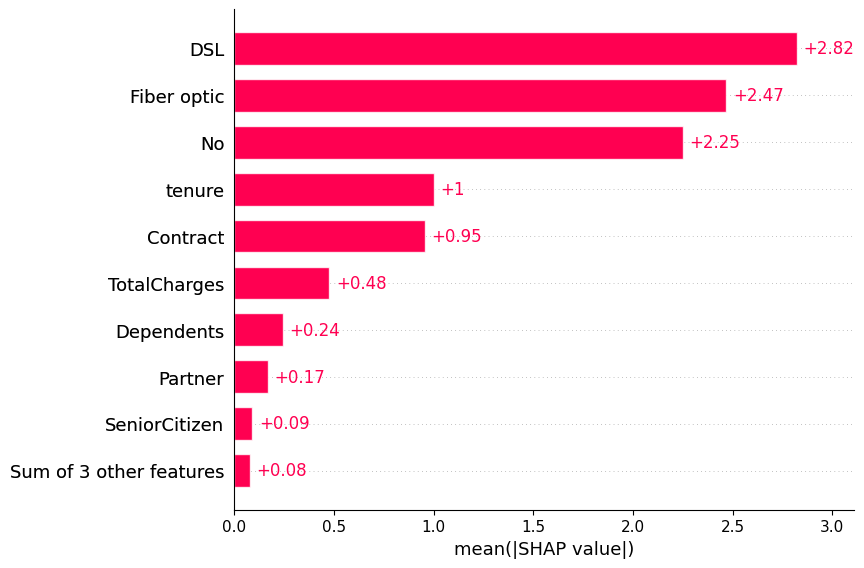

In [58]:
# Find out the most important features in the prediction
import shap
import matplotlib.pyplot as plt

explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)
shap.plots.bar(shap_values)

fig = plt.gcf()

fig.savefig("../figures/shaply_bar_plot.png", dpi=300, bbox_inches='tight')
plt.close()

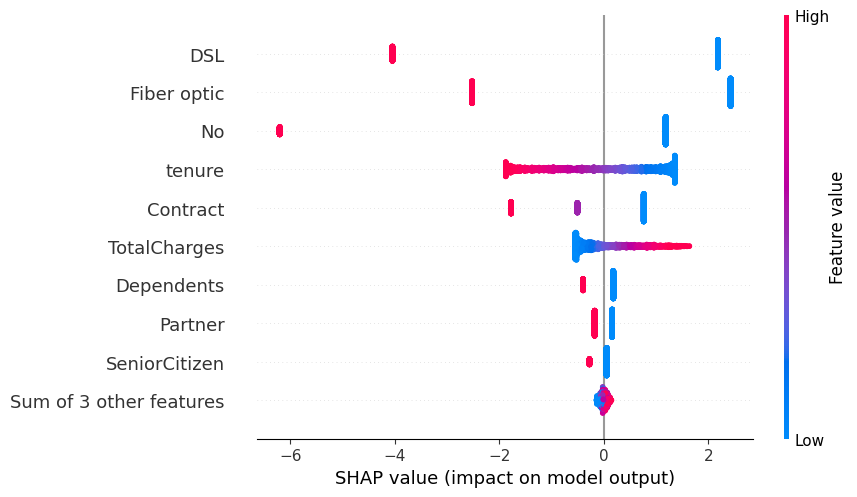

In [59]:
shap.plots.beeswarm(shap_values)

fig = plt.gcf()

fig.savefig("../figures/shaply_beeswarm_plot.png", dpi=300, bbox_inches='tight')
plt.close()